<a href="https://colab.research.google.com/github/findmhel/opf-api/blob/main/fine_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A análise exploratória deste dataset focou em descobrir a propensão de estudantes a desenvolverem depressão em relação a faixa etária e gênero. Algum dos fatores utilizados para correlacionar estes dados foram a duração de sono dos estudantes, a pressão acadêmica e a média das notas por pontos.

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore general warnings
import warnings
warnings.filterwarnings("ignore")

# Scikit-Learn preprocessing and machine learning
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance

# Save trained models
import joblib

In [ ]:
#Loading dataset
data = pd.read_csv("student_depression_dataset (1).csv")
data.head(10)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,'Less than 5 hours',Healthy,PhD,No,4.0,1.0,No,0
6,52,Male,30.0,Thane,Student,3.0,0.0,9.54,4.0,0.0,'7-8 hours',Healthy,BSc,No,1.0,2.0,No,0
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',No,0.0,1.0,Yes,0
8,59,Male,28.0,Nagpur,Student,3.0,0.0,9.79,1.0,0.0,'7-8 hours',Moderate,B.Ed,Yes,12.0,3.0,No,1
9,62,Male,31.0,Nashik,Student,2.0,0.0,8.38,3.0,0.0,'Less than 5 hours',Moderate,LLB,Yes,2.0,5.0,No,1


In the 'Depression' column:
0 = students WITHOUT depression
1 = students WITH depression


In [ ]:
# Dropping irrelevant columns for this specific analysis
irrelevant_cols = ["id", "Work Pressure", "Financial Stress", "Profession", "City", "Job Satisfaction"]

data.drop(columns=irrelevant_cols, axis=1, errors="ignore", inplace=True)
data.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,No,1
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,No,0


A escolha das colunas que foram dropadas se deu a intenção de atender as necessidades específicas para a análise pretendida deste dataset, portanto, todas as colunas referentes a trabalho foram excluídas pois se enquadrariam em outro tipo de pesquisa, como por exemplo, a propensão de desenvolvimento de depressão em estudantes que trabalham.
O drop da coluna "id" se deu devido a todas as linhas possuírem um valor diferente.
O drop da coluna "City" se deu devido a irrelevância para o foco análise.

In [ ]:
#Verificando o número de linhas e a quantidade de colunas do dataset
data.shape

(27901, 12)

In [ ]:
#Exibindo um resumo do DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   Academic Pressure                      27901 non-null  float64
 3   CGPA                                   27901 non-null  float64
 4   Study Satisfaction                     27901 non-null  float64
 5   Sleep Duration                         27901 non-null  object 
 6   Dietary Habits                         27901 non-null  object 
 7   Degree                                 27901 non-null  object 
 8   Have you ever had suicidal thoughts ?  27901 non-null  object 
 9   Work/Study Hours                       27901 non-null  float64
 10  Family History of Mental Illness       27901 non-null  object 
 11  De

In [ ]:
#Descrevendo os dados
data.describe()

,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,7.656104,2.943837,7.156984,0.585499
std,4.905687,1.381465,1.470707,1.361148,3.707642,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,6.290000,2.000000,4.000000,0.000000
50%,25.000000,3.000000,7.770000,3.000000,8.000000,1.000000
75%,30.000000,4.000000,8.920000,4.000000,10.000000,1.000000
max,59.000000,5.000000,10.000000,5.000000,12.000000,1.000000


In [ ]:
#Verificando se há valores ausentes
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Gender                                   0
Age                                      0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [ ]:
#Verificando a presença de dados duplicados
print("Number of duplicated rows:")
data.duplicated().sum()

Number of duplicated rows:


np.int64(3)

In [ ]:
#Dropando dados duplicados
data = data.drop_duplicates()

In [ ]:
#Realizando o mapeamento para checar se há inconsistência no DataFrame
for col in data.columns:
    print(f"{col}: {data[col].map(type).value_counts()}")

Gender: Gender
<class 'str'>    27898
Name: count, dtype: int64
Age: Age
<class 'float'>    27898
Name: count, dtype: int64
Academic Pressure: Academic Pressure
<class 'float'>    27898
Name: count, dtype: int64
CGPA: CGPA
<class 'float'>    27898
Name: count, dtype: int64
Study Satisfaction: Study Satisfaction
<class 'float'>    27898
Name: count, dtype: int64
Sleep Duration: Sleep Duration
<class 'str'>    27898
Name: count, dtype: int64
Dietary Habits: Dietary Habits
<class 'str'>    27898
Name: count, dtype: int64
Degree: Degree
<class 'str'>    27898
Name: count, dtype: int64
Have you ever had suicidal thoughts ?: Have you ever had suicidal thoughts ?
<class 'str'>    27898
Name: count, dtype: int64
Work/Study Hours: Work/Study Hours
<class 'float'>    27898
Name: count, dtype: int64
Family History of Mental Illness: Family History of Mental Illness
<class 'str'>    27898
Name: count, dtype: int64
Depression: Depression
<class 'int'>    27898
Name: count, dtype: int64


In [ ]:
#Verificando se a correção ocorreu corretamente na coluna
pd.set_option("display.max_rows", None)
for col in data.columns:
    print(data[col].value_counts())

Gender
Male      15546
Female    12352
Name: count, dtype: int64
Age
24.0    2258
20.0    2235
28.0    2133
29.0    1950
33.0    1893
25.0    1784
21.0    1726
23.0    1645
18.0    1587
19.0    1560
34.0    1468
27.0    1462
31.0    1427
32.0    1262
22.0    1159
26.0    1155
30.0    1145
35.0      10
38.0       8
36.0       7
42.0       4
39.0       3
48.0       3
46.0       2
43.0       2
37.0       2
44.0       1
51.0       1
49.0       1
58.0       1
54.0       1
59.0       1
56.0       1
41.0       1
Name: count, dtype: int64
Academic Pressure
3.0    7459
5.0    6296
4.0    5155
1.0    4801
2.0    4178
0.0       9
Name: count, dtype: int64
CGPA
8.0400     821
9.9600     425
5.7400     410
8.9500     371
9.2100     343
7.2500     338
7.0900     320
7.8800     318
9.4400     317
8.9100     276
9.9300     274
7.7700     269
8.7400     267
7.1000     252
9.7200     250
5.6400     247
9.3900     243
6.9900     242
6.3700     238
7.5300     234
6.7800     232
9.2400     224
8.5900     2

In [ ]:
#Criando 2 grupos para o diagnóstico de propensão a depressão
students_depressed = data[data["Depression"] == 1]
students_not_depressed = data[data["Depression"] == 0]

In [ ]:
#Criando uma lista com as instâncias que devem ser consideradas na coluna "Dietary Habits"
valid_values = ["Unhealthy", "Moderate", "Healthy"]
data = data[data["Dietary Habits"].isin(valid_values)]

In [ ]:
#Verificando o balanceamento da coluna
data["Depression"].value_counts()

,count
Depression,
1,16325
0,11561


In [ ]:
#Criando grupos por faixa de idade dos estudantes
bins = [13, 17, 23, 29, 34, 39, 44, 49, 54, 59, 64, 69, 130]
labels = [
    "14-17", "18-23", "24-29", "30-34", "35-39",
    "40-44", "45-49", "50-54", "55-59", "60-64",
    "65-69", "70+"
]

data["Age Group"] = pd.cut(data["Age"], bins=bins, labels=labels, right=True)

#LabelEncode de colunas ordinais

In [ ]:
le_age = LabelEncoder()
data["Age Group Encoded"] = le_age.fit_transform(data["Age Group"])

##OrdinalEncoder

In [ ]:
order = [["Unhealthy", "Moderate", "Healthy"]]

encoder = OrdinalEncoder(categories=order)

data["Dietary Encoded"] = encoder.fit_transform(data[["Dietary Habits"]])

##OneHotEncoder

In [ ]:
data = pd.get_dummies(data, columns=["Sleep Duration"], dtype=int)

In [ ]:
#Encode da coluna "Gender" utilizando one-hot para realizar correlação com outras colunas numéricas.
data = pd.get_dummies(data, columns=["Gender"], dtype=int)

In [ ]:
#Encode da coluna "Have you ever had suicidal thoughts?" utilizando one-hot para realizar correlação com outras colunas numéricas.
data = pd.get_dummies(data, columns=["Have you ever had suicidal thoughts ?"], dtype=int)

In [ ]:
data["Suicidal Thoughts"] = data["Have you ever had suicidal thoughts ?_Yes"].map({1: "Yes", 0: "No"})

In [ ]:
#Mode of training columns
for col in data.columns:
    print(f"{col}: MODE = {data[col].mode()[0]}")

Age: MODE = 24.0
Academic Pressure: MODE = 3.0
CGPA: MODE = 8.04
Study Satisfaction: MODE = 4.0
Sleep Duration: MODE = 'Less than 5 hours'
Dietary Habits: MODE = Unhealthy
Degree: MODE = 'Class 12'
Work/Study Hours: MODE = 10.0
Family History of Mental Illness: MODE = No
Depression: MODE = 1
Age Group: MODE = 24-29
Age Group Encoded: MODE = 1
Dietary Encoded: MODE = 0.0
Gender_Female: MODE = 0
Gender_Male: MODE = 1
Have you ever had suicidal thoughts ?_No: MODE = 0
Have you ever had suicidal thoughts ?_Yes: MODE = 1
Suicidal Thoughts: MODE = Yes


In [ ]:
#Verificando a distribuição dos gêneros presentes nesta pesquisa
print(data[['Gender_Female', 'Gender_Male']].sum())

Gender_Female    12348
Gender_Male      15538
dtype: int64


In [ ]:
data.columns

Index(['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'Work/Study Hours',
       'Family History of Mental Illness', 'Depression', 'Age Group',
       'Age Group Encoded', 'Dietary Encoded', 'Gender_Female', 'Gender_Male',
       'Have you ever had suicidal thoughts ?_No',
       'Have you ever had suicidal thoughts ?_Yes', 'Suicidal Thoughts'],
      dtype='object')

A maioria dos estudantes deste dataset são homens.

##Pré processamento dos dados para o treinamento

In [ ]:
training_cols = [
    "Academic Pressure", "CGPA", "Study Satisfaction",
    "Age Group Encoded", "Dietary Encoded",
    "Gender_Female", "Gender_Male",
    "Have you ever had suicidal thoughts ?_No",
    "Have you ever had suicidal thoughts ?_Yes",
] + [c for c in data.columns if c.startswith("Sleep Duration_")]

X = data[training_cols]
y = data["Depression"]

In [ ]:
print(data.columns.tolist())

['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Work/Study Hours', 'Family History of Mental Illness', 'Depression', 'Age Group', 'Age Group Encoded', 'Dietary Encoded', 'Gender_Female', 'Gender_Male', 'Have you ever had suicidal thoughts ?_No', 'Have you ever had suicidal thoughts ?_Yes', 'Suicidal Thoughts']


In [ ]:
# Rebuild categorical Sleep Duration from dummy columns
sleep_cols = [
    "Sleep Duration_'5-6 hours'",
    "Sleep Duration_'7-8 hours'",
    "Sleep Duration_'Less than 5 hours'",
    "Sleep Duration_'More than 8 hours'",
    "Sleep Duration_Others"
]

# Map dummy back to category
sleep_map = {
    "Sleep Duration_'5-6 hours'": "5-6 hours",
    "Sleep Duration_'7-8 hours'": "7-8 hours",
    "Sleep Duration_'Less than 5 hours'": "Less than 5 hours",
    "Sleep Duration_'More than 8 hours'": "More than 8 hours",
    "Sleep Duration_Others": "Others"
}

data["Sleep Duration"] = data[sleep_cols].idxmax(axis=1).map(sleep_map)

In [ ]:
data.to_csv("dataset_treated.csv", index=False)

##Verificando a análise por plotagens

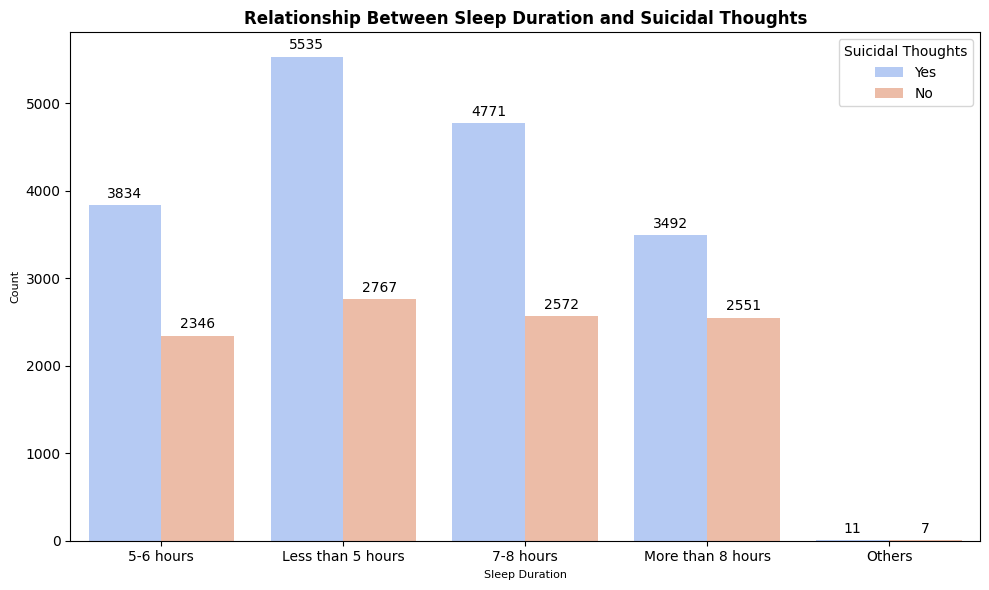

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(
    data=data,
    x="Sleep Duration",
    hue="Suicidal Thoughts",
    palette='coolwarm'
)
plt.title("Relationship Between Sleep Duration and Suicidal Thoughts", fontsize=12, weight='bold')
plt.xlabel("Sleep Duration", fontsize=8)
plt.ylabel("Count", fontsize=8)

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=10)

plt.tight_layout()
plt.show()

É possível identificar que:
  

*   Os estudantes que dormem menos que 5 horas por noite são os mais propensos a ter pensamentos suicidas.
*   Os estudantes que dormem mais de 8 horas por noite são os menos propensos a ter pensamentos suicidas.

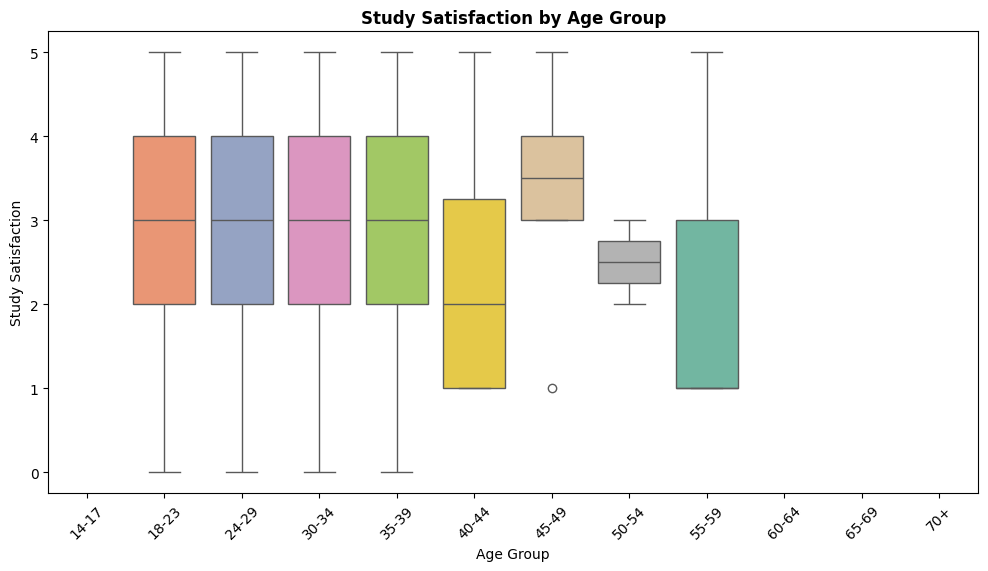

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age Group', y='Study Satisfaction', data=data, palette='Set2')

plt.title("Study Satisfaction by Age Group", fontsize=12, weight='bold')
plt.xlabel("Age Group")
plt.ylabel("Study Satisfaction")

plt.xticks(rotation=45)
plt.show()

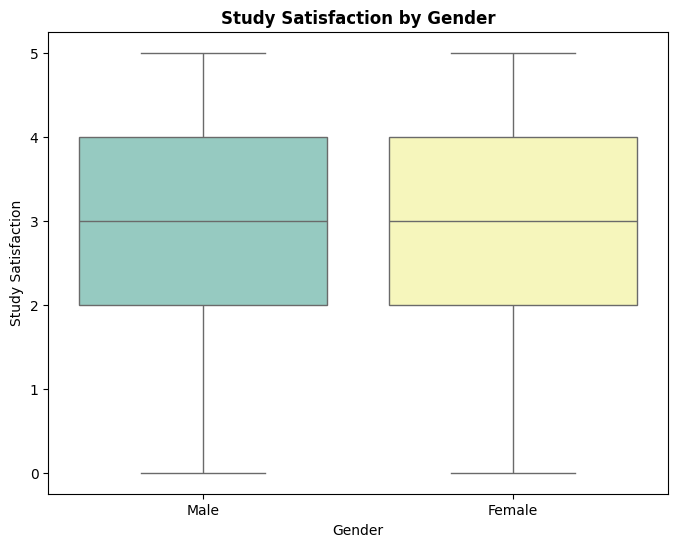

In [ ]:
data["Gender_Label"] = data["Gender_Female"].map({1: "Female", 0: "Male"})

plt.figure(figsize=(8,6))
sns.boxplot(x='Gender_Label', y='Study Satisfaction', data=data, palette="Set3")

plt.title("Study Satisfaction by Gender", fontsize=12, weight='bold')
plt.xlabel("Gender")
plt.ylabel("Study Satisfaction")
plt.show()

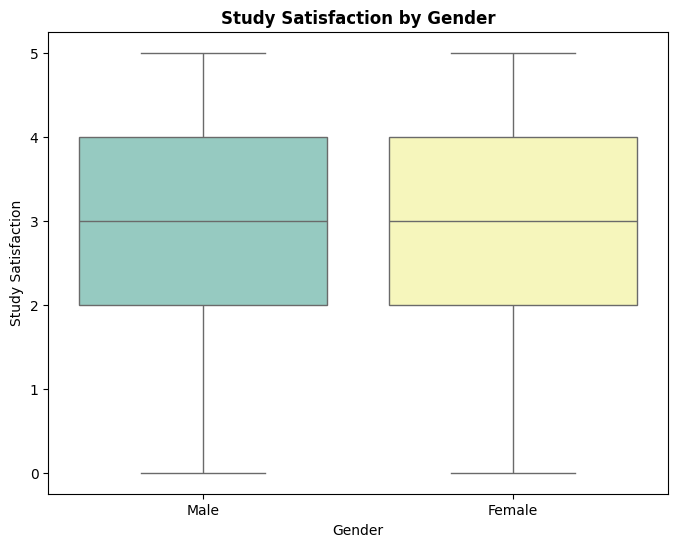

In [ ]:
data["Gender_Label"] = data["Gender_Female"].map({1: "Female", 0: "Male"})

plt.figure(figsize=(8,6))
sns.boxplot(x='Gender_Label', y='Study Satisfaction', data=data, palette="Set3")

plt.title("Study Satisfaction by Gender", fontsize=12, weight='bold')
plt.xlabel("Gender")
plt.ylabel("Study Satisfaction")
plt.show()

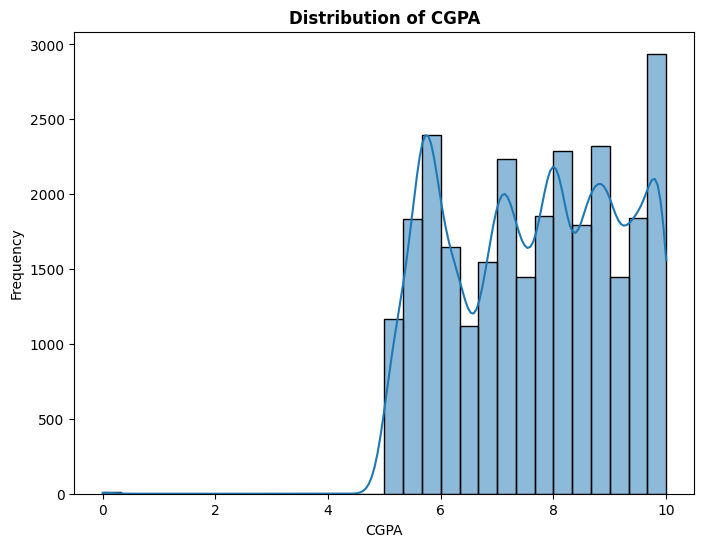

In [ ]:
#Tendência da Média das notas por pontos
plt.figure(figsize=(8,6))
sns.histplot(data['CGPA'], kde=True, bins=30)

plt.title("Distribution of CGPA", fontsize=12, weight='bold')
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.show()

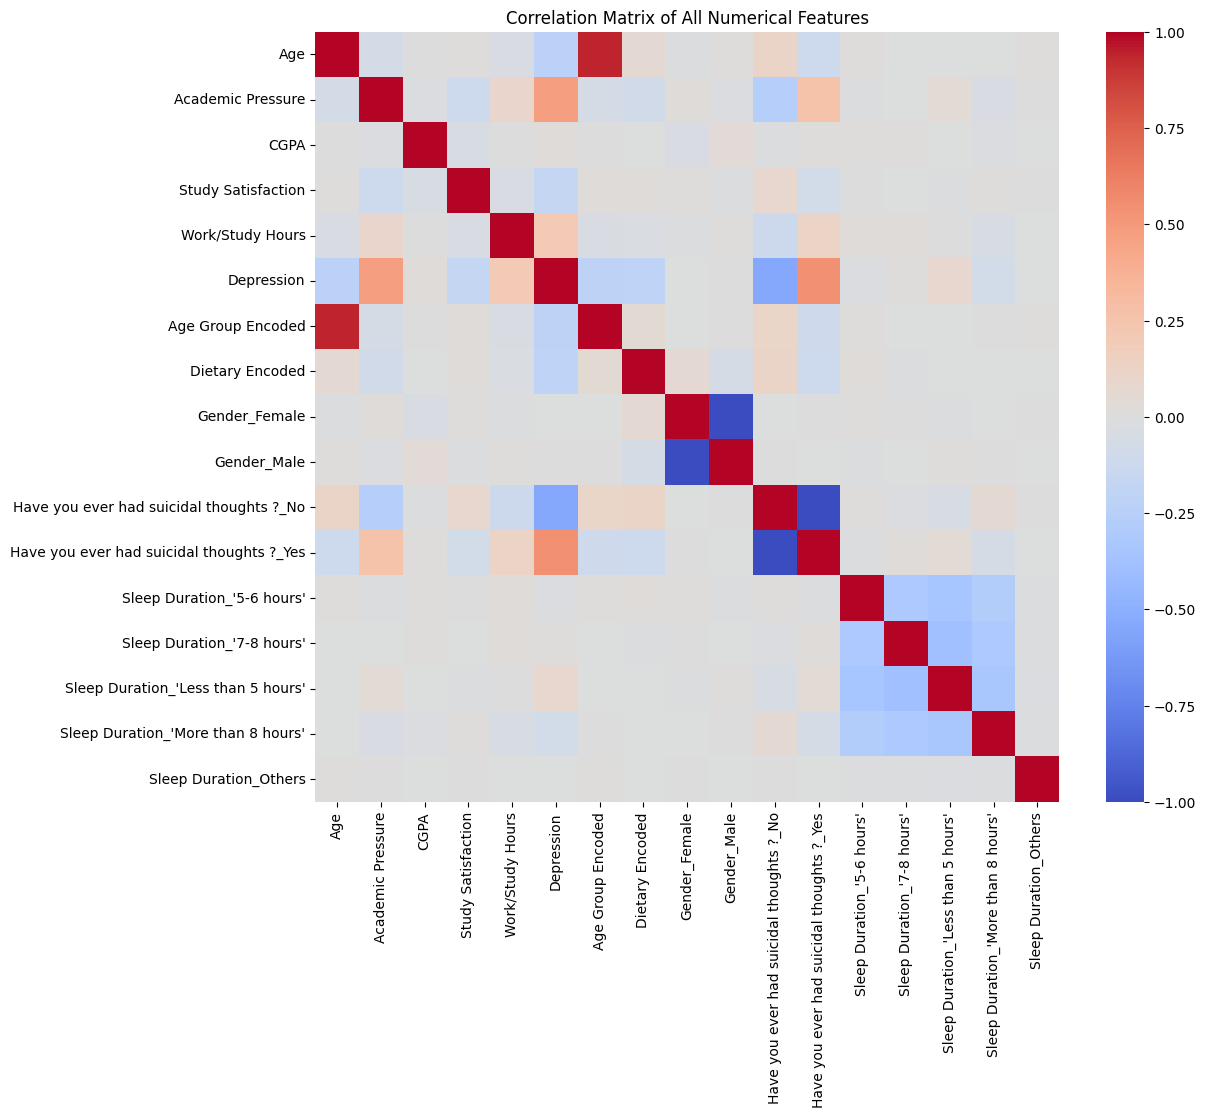

In [ ]:
plt.figure(figsize=(12,10))

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

sns.heatmap(numeric_data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix of All Numerical Features")
plt.show()

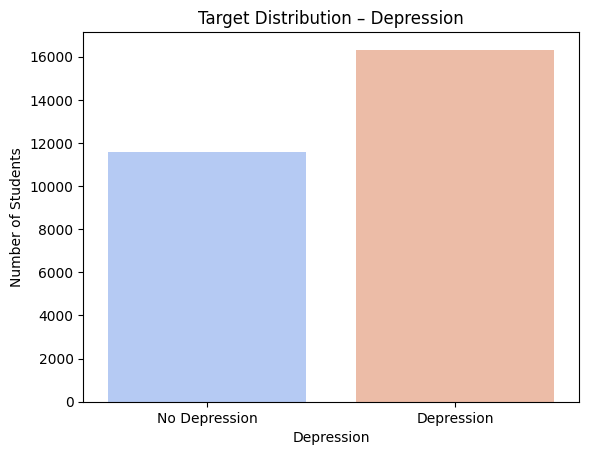

In [ ]:
sns.countplot(x=data['Depression'], palette='coolwarm')
plt.title("Target Distribution – Depression")
plt.xticks([0,1], ["No Depression", "Depression"])
plt.ylabel("Number of Students")
plt.show()

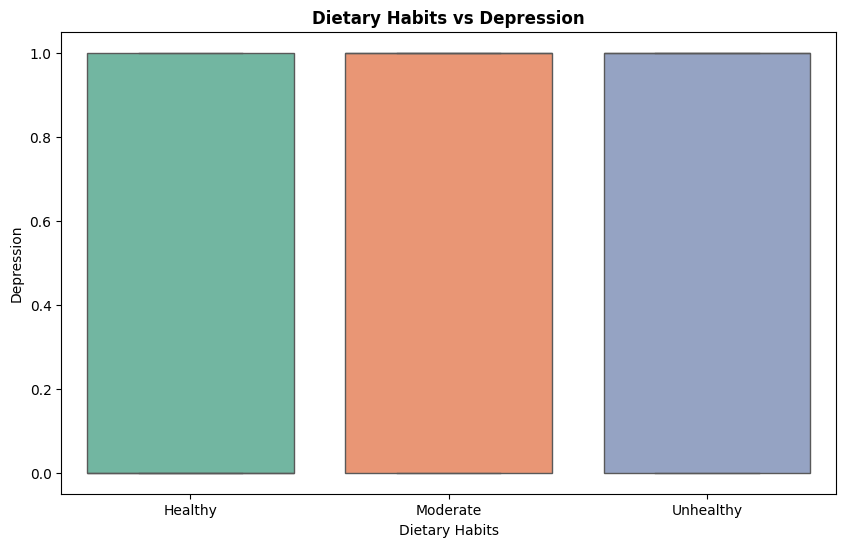

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Dietary Habits", y="Depression", data=data, palette="Set2")
plt.title("Dietary Habits vs Depression", fontsize=12, weight='bold')
plt.xlabel("Dietary Habits")
plt.ylabel("Depression")
plt.show()

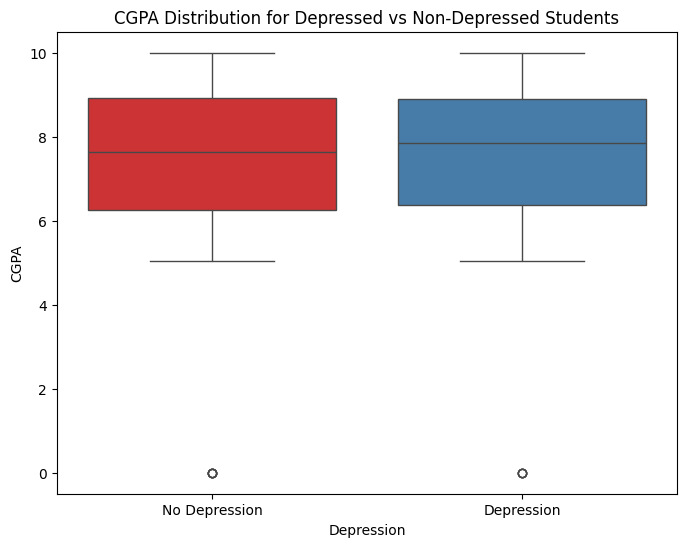

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Depression', y='CGPA', data=data, palette="Set1")
plt.title("CGPA Distribution for Depressed vs Non-Depressed Students")
plt.xticks([0,1], ["No Depression", "Depression"])
plt.show()

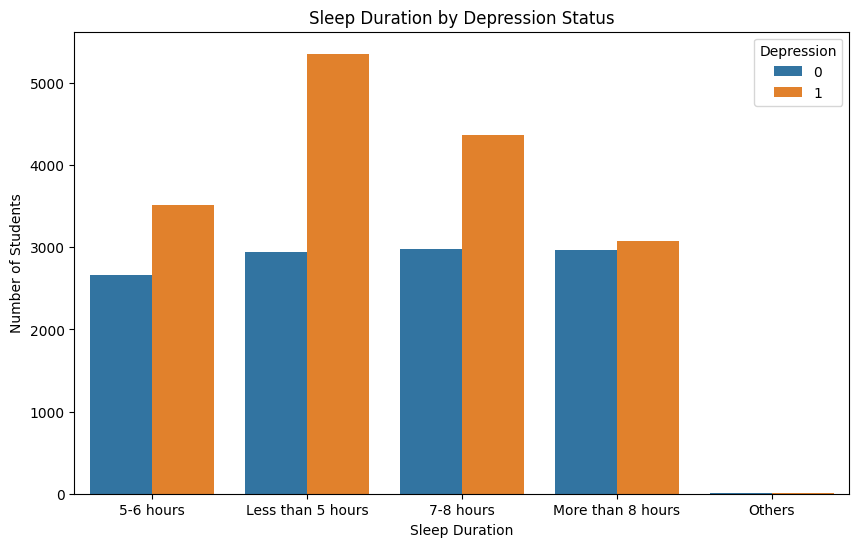

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Sleep Duration", hue="Depression", data=data)
plt.title("Sleep Duration by Depression Status")
plt.xlabel("Sleep Duration")
plt.ylabel("Number of Students")
plt.show()

A correlação entre as colunas que estão sendo utilizadas para realizar a análise destes dados, sendo dividido por dois grupos:


*   0: A correlação das colunas entre os estudantes que não possuem depressão
*   1: A correlação das colunas entre os estudantes que possuem depressão



In [ ]:
#Definindo o target
rotulos = data['Depression']
rotulos.head()

,Depression
0,1
1,0
2,0
3,1
4,0


In [ ]:
#Contagem de valores do target
rotulos.value_counts()

,count
Depression,
1,16325
0,11561


##Treinamento da IA

In [ ]:
#Divisão Treino/Teste (30% dos dados será usada para teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
hist_model = {}

#Model
hist_model["HistGradientBoosting"] = HistGradientBoostingClassifier(
    learning_rate=0.08,
    max_depth=10,
    max_iter=250,
    l2_regularization=0.3,
    early_stopping=True,
    random_state=42
)

print("\nHistGradientBoosting")

#Train model
hist_model["HistGradientBoosting"].fit(X_train, y_train)

#Predict
y_pred_hist_model = hist_model["HistGradientBoosting"].predict(X_test)

#Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred_hist_model))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_hist_model))

acc_hist_model = accuracy_score(y_test, y_pred_hist_model)
print(f"\nAccuracy: {acc_hist_model:.4f}")


HistGradientBoosting

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      2313
           1       0.84      0.87      0.85      3265

    accuracy                           0.82      5578
   macro avg       0.82      0.81      0.82      5578
weighted avg       0.82      0.82      0.82      5578

Confusion Matrix:
[[1754  559]
 [ 421 2844]]

Accuracy: 0.8243


In [ ]:
#Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_hist_model)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix – HistGradientBoosting", fontsize=12, weight="bold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
#Permutation Importance
result = permutation_importance(
    hist_model["HistGradientBoosting"],
    X_test,
    y_test,
    n_repeats=15,
    random_state=42,
    n_jobs=-1
)

importances = result.importances_mean
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.title("Permutation Feature Importance – HistGradientBoosting", fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


In [ ]:
#Save model + feature list
joblib.dump(hist_model["HistGradientBoosting"], "hist_model.pkl")
joblib.dump(list(X.columns), "features.pkl")

In [ ]:
#Function to preprocess new data
def preprocess_new_data(df_new):

    #Load the feature list used during training
    features = joblib.load("features.pkl")

    #Ordinal Encoding (same as training)
    if "Dietary Habits" in df_new.columns:
        order_diet = [["Unhealthy", "Moderate", "Healthy"]]
        encoder_diet = OrdinalEncoder(categories=order_diet)
        df_new["Dietary Encoded"] = encoder_diet.fit_transform(
            df_new[["Dietary Habits"]]
        )

    if "Age Group" in df_new.columns:
        order_age = [["15-19", "20-24", "25-29", "30-34"]]
        encoder_age = OrdinalEncoder(categories=order_age)
        df_new["Age Group Encoded"] = encoder_age.fit_transform(
            df_new[["Age Group"]]
        )

    #One-hot encoding (same as training)
    df_new = pd.get_dummies(df_new)

    #Align the new data with training features
    #-Missing columns → fill with 0
    #-Extra columns → removed
    df_new = df_new.reindex(columns=features, fill_value=0)

    return df_new

In [ ]:
#EXEMPLO DE DADOS CRIADOS POR VOCÊ
new_student = pd.DataFrame([{
    "Age": 21,
    "Academic Pressure": "High",
    "CGPA": 7.8,
    "Study Satisfaction": "Moderate",
    "Dietary Habits": "Healthy",
    "Sleep Duration": "7-8 hours",
    "Degree": "Undergraduate",
    "Work/Study Hours": "4-6 hours",
    "Family History of Mental Illness": "No",
    "Gender": "Female",
    "Have you ever had suicidal thoughts ?": "No"
}])

#Preprocess
new_processed = preprocess_new_data(new_student)

#Load trained model
model = joblib.load("hist_model.pkl")

#Predict
pred = model.predict(new_processed)[0]
prob = model.predict_proba(new_processed)[0][1]

print(f"Predicted Depression: {pred}")
print(f"Probability of Depression: {prob:.2%}")


Link apresentação:https://www.canva.com/design/DAG6euyQRAk/053CjwG534ht3UuIqnS4cQ/view?utm_content=DAG6euyQRAk&utm_campaign=designshare&utm_medium=link2&utm_source=uniquelinks&utlId=hd2745eebd9